In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

In [4]:
#reading data
df = pd.read_csv('D://Kaggle//amazon fine reviews/Reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


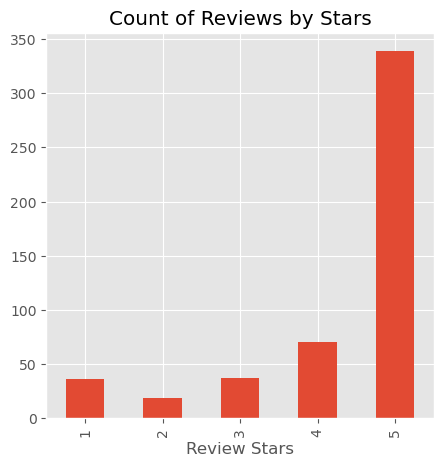

In [6]:
ax = df['Score'].value_counts().sort_index() \
.plot(kind='bar', title= 'Count of Reviews by Stars', figsize=(5,5))
ax.set_xlabel('Review Stars')
plt.show()

In [7]:
example = df['Text'][51]
print(example)

Got a free package of these with a bottle of bloody mary mix I bought from the seller, and the advertising worked..lol,  I tried them, and shared them with 2 buddies, and we all loved them...  So im here to buy more, and noticed there were no reviews yet,...  well now there is.  They are Hot,  but not "burn your mouth forever hot"  its a nice temp...  Perfect for us..


In [8]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [9]:
tokens = nltk.word_tokenize(example)
print(tokens)

['Got', 'a', 'free', 'package', 'of', 'these', 'with', 'a', 'bottle', 'of', 'bloody', 'mary', 'mix', 'I', 'bought', 'from', 'the', 'seller', ',', 'and', 'the', 'advertising', 'worked', '..', 'lol', ',', 'I', 'tried', 'them', ',', 'and', 'shared', 'them', 'with', '2', 'buddies', ',', 'and', 'we', 'all', 'loved', 'them', '...', 'So', 'im', 'here', 'to', 'buy', 'more', ',', 'and', 'noticed', 'there', 'were', 'no', 'reviews', 'yet', ',', '...', 'well', 'now', 'there', 'is', '.', 'They', 'are', 'Hot', ',', 'but', 'not', '``', 'burn', 'your', 'mouth', 'forever', 'hot', "''", 'its', 'a', 'nice', 'temp', '...', 'Perfect', 'for', 'us', '..']


In [10]:
#redusing the size of tokens to 10
tokens[:10]

['Got', 'a', 'free', 'package', 'of', 'these', 'with', 'a', 'bottle', 'of']

In [11]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>


False

In [12]:

# Perform part-of-speech tagging
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Got', 'NNP'),
 ('a', 'DT'),
 ('free', 'JJ'),
 ('package', 'NN'),
 ('of', 'IN'),
 ('these', 'DT'),
 ('with', 'IN'),
 ('a', 'DT'),
 ('bottle', 'NN'),
 ('of', 'IN')]

In [13]:
nltk.download('maxent_ne_chunker')

[nltk_data] Error loading maxent_ne_chunker: <urlopen error [Errno
[nltk_data]     11001] getaddrinfo failed>


False

In [14]:
nltk.download('words')

[nltk_data] Error loading words: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [15]:
# Using prettyprint an chunk
entities = nltk.chunk.ne_chunk(tagged)
entities .pprint()

(S
  Got/NNP
  a/DT
  free/JJ
  package/NN
  of/IN
  these/DT
  with/IN
  a/DT
  bottle/NN
  of/IN
  bloody/NN
  mary/JJ
  mix/NN
  I/PRP
  bought/VBD
  from/IN
  the/DT
  seller/NN
  ,/,
  and/CC
  the/DT
  advertising/NN
  worked/VBD
  ../JJ
  lol/NN
  ,/,
  I/PRP
  tried/VBD
  them/PRP
  ,/,
  and/CC
  shared/VBD
  them/PRP
  with/IN
  2/CD
  buddies/NNS
  ,/,
  and/CC
  we/PRP
  all/DT
  loved/VBD
  them/PRP
  .../:
  So/RB
  im/RB
  here/RB
  to/TO
  buy/VB
  more/JJR
  ,/,
  and/CC
  noticed/VBD
  there/EX
  were/VBD
  no/DT
  reviews/NN
  yet/RB
  ,/,
  .../:
  well/RB
  now/RB
  there/EX
  is/VBZ
  ./.
  They/PRP
  are/VBP
  (PERSON Hot/NNP)
  ,/,
  but/CC
  not/RB
  ``/``
  burn/VB
  your/PRP$
  mouth/NN
  forever/RB
  hot/JJ
  ''/''
  its/PRP$
  a/DT
  nice/JJ
  temp/NN
  .../:
  Perfect/NNP
  for/IN
  us/PRP
  ../VBP)


In [17]:
# VADER sentiment scoring
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Create the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [18]:
#Checking the polarity of Random Sentences
sia.polarity_scores('Hi, My name is Mohawiz')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [19]:
sia.polarity_scores('this does not taste good')

{'neg': 0.376, 'neu': 0.624, 'pos': 0.0, 'compound': -0.3412}

In [20]:
sia .polarity_scores("I am happy to buy this outfit")


{'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'compound': 0.5719}

In [21]:
print(example)
sia.polarity_scores(example)


Got a free package of these with a bottle of bloody mary mix I bought from the seller, and the advertising worked..lol,  I tried them, and shared them with 2 buddies, and we all loved them...  So im here to buy more, and noticed there were no reviews yet,...  well now there is.  They are Hot,  but not "burn your mouth forever hot"  its a nice temp...  Perfect for us..


{'neg': 0.047, 'neu': 0.735, 'pos': 0.218, 'compound': 0.9194}

In [19]:
#Running the polarity scores on entire Data Set
 # creating a dict for storing result
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)


  0%|          | 0/500 [00:00<?, ?it/s]

In [20]:
#storing res in pandas Dataframes .T will convert DF vertically
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [33]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


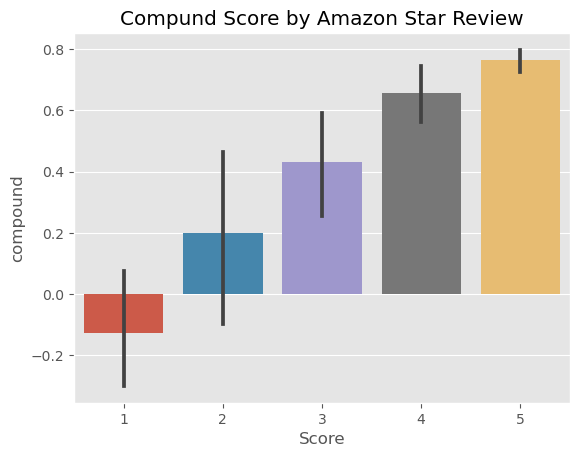

In [21]:
ax= sns.barplot(data=vaders, x = 'Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

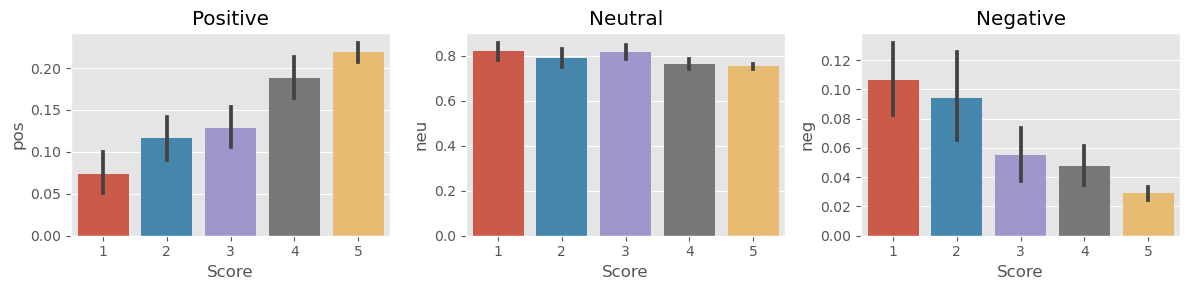

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [22]:
#The Transformers library by Hugging Face provides pre-trained models for natural language processing tasks, such as text generation, translation, sentiment analysis, and more
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [24]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [25]:
sent_pipeline('its seems that python is interesting After All')

[{'label': 'POSITIVE', 'score': 0.998372495174408}]

In [26]:
sent_pipeline('I love My MOM')

[{'label': 'POSITIVE', 'score': 0.9998455047607422}]

In [57]:
sent_pipeline('Its too cold outside')

[{'label': 'NEGATIVE', 'score': 0.9994953870773315}]

In [27]:
print(example)

Got a free package of these with a bottle of bloody mary mix I bought from the seller, and the advertising worked..lol,  I tried them, and shared them with 2 buddies, and we all loved them...  So im here to buy more, and noticed there were no reviews yet,...  well now there is.  They are Hot,  but not "burn your mouth forever hot"  its a nice temp...  Perfect for us..


In [39]:
sent_pipeline('exapmle')

[{'label': 'NEGATIVE', 'score': 0.9710894823074341}]

In [28]:
#pipeline is designed to handle batch. You can provide it with the list of texts
texts = ["I love using transformers!", "This is not very good."]
results = sent_pipeline(texts)

In [39]:
#importing certain texts from DATFRAME to determine the accuracy of the results 
test = [
    "My daughter loves twizzlers and this shipment of six pounds really hit the spot. It's exactly what you would expect...six packages of strawberry twizzlers.",
    "I love eating them and they are good for watching TV and looking at movies! It is not too sweet. I like to transfer them to a zip lock baggie so they stay fresh so I can take my time eating them.",
    "I am very satisfied with my Twizzler purchase. I shared these with others and we have all enjoyed them. I will definitely be ordering more.",
    "I can remember buying this candy as a kid and the quality hasn't dropped in all these years. Still a superb product you won't be disappointed with.",
    "The candy is just red, No flavor. Just plain and chewy. I would never buy them again."
]

Answer = sent_pipeline(test)

Answer

[{'label': 'POSITIVE', 'score': 0.9992697834968567},
 {'label': 'POSITIVE', 'score': 0.9688601493835449},
 {'label': 'POSITIVE', 'score': 0.9998708963394165},
 {'label': 'POSITIVE', 'score': 0.9995959401130676},
 {'label': 'NEGATIVE', 'score': 0.9993558526039124}]

Text: My daughter loves twizzlers and this shipment of six pounds really hit the spot. It's exactly what you would expect...six packages of strawberry twizzlers.
Sentiment: POSITIVE
Score: 0.9992697834968567

Text: I love eating them and they are good for watching TV and looking at movies! It is not too sweet. I like to transfer them to a zip lock baggie so they stay fresh so I can take my time eating them.
Sentiment: POSITIVE
Score: 0.9688601493835449

Text: I am very satisfied with my Twizzler purchase. I shared these with others and we have all enjoyed them. I will definitely be ordering more.
Sentiment: POSITIVE
Score: 0.9998708963394165

Text: I can remember buying this candy as a kid and the quality hasn't dropped in all these years. Still a superb product you won't be disappointed with.
Sentiment: POSITIVE
Score: 0.9995959401130676

Text: The candy is just red, No flavor. Just plain and chewy. I would never buy them again.
Sentiment: NEGATIVE
Score: 0.9993558526039124



In [29]:
from tqdm import tqdm

pip = {} 

for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        pip[myid] = sent_pipeline(text)
    except RuntimeError:
        print(f'Broke for id {myid}')
            

 17%|█▋        | 83/500 [00:21<04:31,  1.54it/s]

Broke for id 83


 38%|███▊      | 188/500 [00:50<00:47,  6.58it/s]

Broke for id 187


100%|██████████| 500/500 [02:04<00:00,  4.01it/s]


In [41]:
# Display the results
print("Results:")
for myid, result in pip.items():
    print(f"ID: {myid}, Sentiment: {result}")

Results:
ID: 1, Sentiment: [{'label': 'POSITIVE', 'score': 0.9983851909637451}]
ID: 2, Sentiment: [{'label': 'NEGATIVE', 'score': 0.9995254278182983}]
ID: 3, Sentiment: [{'label': 'POSITIVE', 'score': 0.9997652173042297}]
ID: 4, Sentiment: [{'label': 'POSITIVE', 'score': 0.9991534948348999}]
ID: 5, Sentiment: [{'label': 'POSITIVE', 'score': 0.9987082481384277}]
ID: 6, Sentiment: [{'label': 'POSITIVE', 'score': 0.9992551207542419}]
ID: 7, Sentiment: [{'label': 'POSITIVE', 'score': 0.9993639588356018}]
ID: 8, Sentiment: [{'label': 'POSITIVE', 'score': 0.9998829364776611}]
ID: 9, Sentiment: [{'label': 'POSITIVE', 'score': 0.9985174536705017}]
ID: 10, Sentiment: [{'label': 'POSITIVE', 'score': 0.9994561076164246}]
ID: 11, Sentiment: [{'label': 'POSITIVE', 'score': 0.9361911416053772}]
ID: 12, Sentiment: [{'label': 'NEGATIVE', 'score': 0.9992430210113525}]
ID: 13, Sentiment: [{'label': 'NEGATIVE', 'score': 0.9899449944496155}]
ID: 14, Sentiment: [{'label': 'POSITIVE', 'score': 0.99988901615